<a href="https://colab.research.google.com/github/Nexus4757/Face-Mask-Detection/blob/main/Face_Mask_Detection_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Mask Dataset

In [3]:
# API to fetch dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 86% 141M/163M [00:00<00:00, 205MB/s]
100% 163M/163M [00:00<00:00, 216MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  drive  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_905.jpg', 'with_mask_1357.jpg', 'with_mask_3643.jpg', 'with_mask_1650.jpg', 'with_mask_682.jpg']
['with_mask_517.jpg', 'with_mask_3598.jpg', 'with_mask_1827.jpg', 'with_mask_2508.jpg', 'with_mask_3212.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1151.jpg', 'without_mask_3258.jpg', 'without_mask_2643.jpg', 'without_mask_1470.jpg', 'without_mask_2038.jpg']
['without_mask_638.jpg', 'without_mask_3170.jpg', 'without_mask_415.jpg', 'without_mask_2463.jpg', 'without_mask_3549.jpg']


In [9]:
print('Number of with_mask images: ', len(with_mask_files))
print('Number of without_mask images: ', len(without_mask_files))

Number of with_mask images:  3725
Number of without_mask images:  3828


**Labelling the Data**

with mask --> 1

without mask --> 0

In [10]:
# create the labels

with_mask_labels = [1]* len(with_mask_files)

without_mask_labels = [0]* len(without_mask_files)

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
# Adding two lista i.e merging the lists
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


***Displaying the images ***

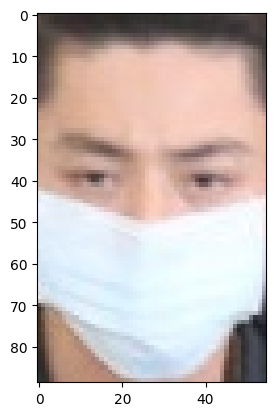

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_716.jpg')
imgplot = plt.imshow(img)
plt.show()

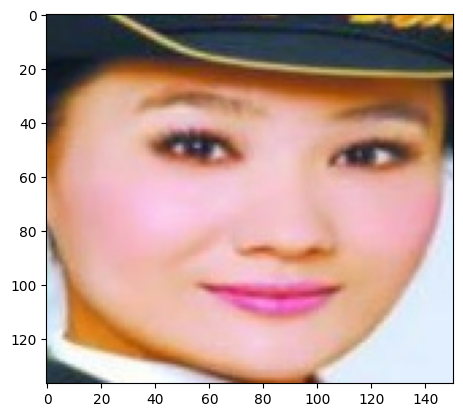

In [15]:
img = mpimg.imread('/content/data/without_mask/without_mask_3232.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the images
2. Convert images to NumPy arrays

In [16]:
# Converting images to NumPy arrays
with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files :
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files :
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
len(data)

7553

array([[[37, 33, 32],
        [40, 34, 32],
        [46, 37, 33],
        ...,
        [25, 22, 27],
        [25, 23, 27],
        [30, 28, 29]],

       [[38, 34, 33],
        [41, 35, 33],
        [47, 38, 34],
        ...,
        [25, 23, 28],
        [25, 23, 27],
        [30, 28, 29]],

       [[38, 34, 33],
        [42, 36, 34],
        [48, 39, 35],
        ...,
        [25, 23, 28],
        [25, 23, 27],
        [30, 28, 29]],

       ...,

       [[25, 20, 24],
        [28, 23, 27],
        [32, 27, 31],
        ...,
        [26, 24, 28],
        [20, 18, 23],
        [20, 18, 23]],

       [[25, 20, 24],
        [28, 23, 27],
        [31, 26, 30],
        ...,
        [28, 25, 30],
        [22, 20, 25],
        [19, 17, 22]],

       [[26, 21, 25],
        [29, 24, 28],
        [31, 26, 30],
        ...,
        [28, 26, 30],
        [24, 22, 27],
        [21, 19, 24]]], dtype=uint8)
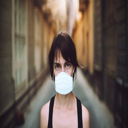

In [18]:
data[0]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# Converting image list and label list of NumPy arrays
X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.3, random_state = 2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (5287, 128, 128, 3) (2266, 128, 128, 3)


In [28]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [29]:
X_train_scaled[0]

array([[[0.79607843, 0.79607843, 0.79607843],
        [0.8       , 0.8       , 0.8       ],
        [0.80392157, 0.80392157, 0.80392157],
        ...,
        [0.80784314, 0.80784314, 0.80784314],
        [0.80784314, 0.80784314, 0.80784314],
        [0.81176471, 0.81176471, 0.81176471]],

       [[0.8       , 0.8       , 0.8       ],
        [0.8       , 0.8       , 0.8       ],
        [0.80392157, 0.80392157, 0.80392157],
        ...,
        [0.80784314, 0.80784314, 0.80784314],
        [0.80784314, 0.80784314, 0.80784314],
        [0.81176471, 0.81176471, 0.81176471]],

       [[0.80392157, 0.80392157, 0.80392157],
        [0.80392157, 0.80392157, 0.80392157],
        [0.80784314, 0.80784314, 0.80784314],
        ...,
        [0.81176471, 0.81176471, 0.81176471],
        [0.81176471, 0.81176471, 0.81176471],
        [0.81568627, 0.81568627, 0.81568627]],

       ...,

       [[0.8627451 , 0.8627451 , 0.87058824],
        [0.8627451 , 0.8627451 , 0.87058824],
        [0.8627451 , 0

**Building a Convolutional Neural Network**

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))



# Output filter
model.add(keras.layers.Dense(num_of_classes,activation = 'sigmoid'))

In [32]:
# Compile the neural network
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [33]:
# Training the Neural network
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
149/149 [==============================] - 17s 105ms/step - loss: 0.4570 - acc: 0.7871 - val_loss: 0.2690 - val_acc: 0.8960
Epoch 2/5
149/149 [==============================] - 15s 99ms/step - loss: 0.2968 - acc: 0.8850 - val_loss: 0.2740 - val_acc: 0.8771
Epoch 3/5
149/149 [==============================] - 14s 96ms/step - loss: 0.2418 - acc: 0.9075 - val_loss: 0.2343 - val_acc: 0.9112
Epoch 4/5
149/149 [==============================] - 15s 98ms/step - loss: 0.2048 - acc: 0.9197 - val_loss: 0.2302 - val_acc: 0.9168
Epoch 5/5
149/149 [==============================] - 14s 97ms/step - loss: 0.1819 - acc: 0.9367 - val_loss: 0.1892 - val_acc: 0.9357


In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20, callbacks=[early_stopping])


Epoch 1/20
149/149 [==============================] - 15s 98ms/step - loss: 0.1492 - acc: 0.9466 - val_loss: 0.2398 - val_acc: 0.9168
Epoch 2/20
149/149 [==============================] - 15s 99ms/step - loss: 0.1303 - acc: 0.9533 - val_loss: 0.2034 - val_acc: 0.9338
Epoch 3/20
149/149 [==============================] - 15s 98ms/step - loss: 0.1160 - acc: 0.9582 - val_loss: 0.2248 - val_acc: 0.9282
Epoch 4/20
149/149 [==============================] - 15s 99ms/step - loss: 0.1004 - acc: 0.9641 - val_loss: 0.2399 - val_acc: 0.9414
Epoch 5/20
149/149 [==============================] - 15s 99ms/step - loss: 0.0827 - acc: 0.9718 - val_loss: 0.2377 - val_acc: 0.9282


**Model Evaluation**

In [35]:
from sklearn.metrics import classification_report, f1_score
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
Y_pred = model.predict(X_test_scaled)
Y_pred_labels = np.argmax(Y_pred, axis=1)
print('Test Accuracy = ', accuracy)
print(classification_report(Y_test, Y_pred_labels, target_names=["Without Mask", "With Mask"]))


71/71 [==============================] - 2s 28ms/step
Test Accuracy =  0.9386584162712097
              precision    recall  f1-score   support

Without Mask       0.94      0.94      0.94      1135
   With Mask       0.94      0.94      0.94      1131

    accuracy                           0.94      2266
   macro avg       0.94      0.94      0.94      2266
weighted avg       0.94      0.94      0.94      2266



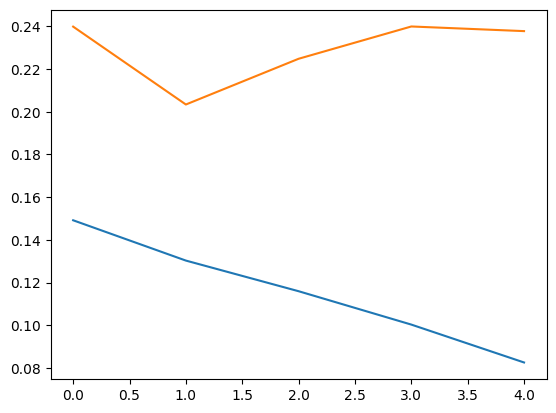

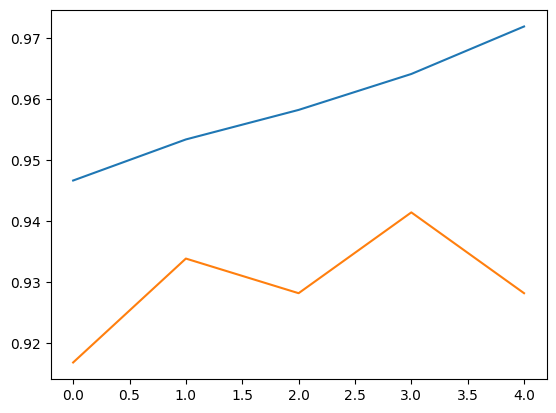

In [36]:
h = history
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend
plt.show()

**Predictive Dataset**

Path of the image to be predicted: /content/data/without_mask/without_mask_3000.jpg


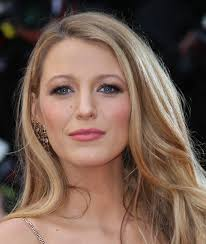

1/1 [==============================] - 0s 29ms/step
[[0.5391023 0.5157223]]
0
The person in the image is not wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The person in the image is not wearing a mask')
else:
  print('The person in the image is wearing a mask')